## A basic framework for implementing Autoregressive (AR) models for time series forecasting in Python

- Autoregression (AR) is a type of time series model used for predicting future values based on past values. It assumes that the current value of the series is a linear combination of its previous values, plus a random error term. The basic idea is to exploit the temporal dependence in data where the value at time 
𝑡
t can be explained by its own previous values.

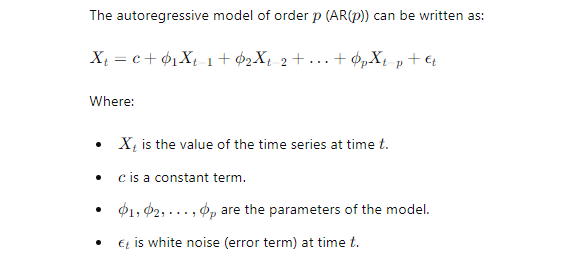
### Key points about autoregression:

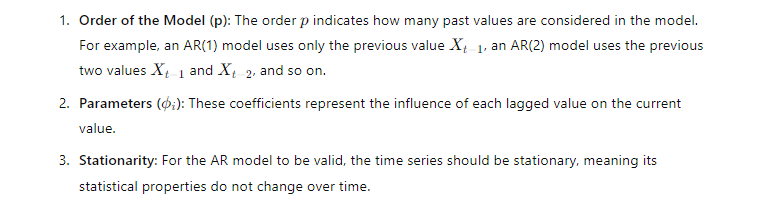

## Example: AR(1) Model
Assume we have a time series which follows an AR(1) model. The AR(1) model is given by:
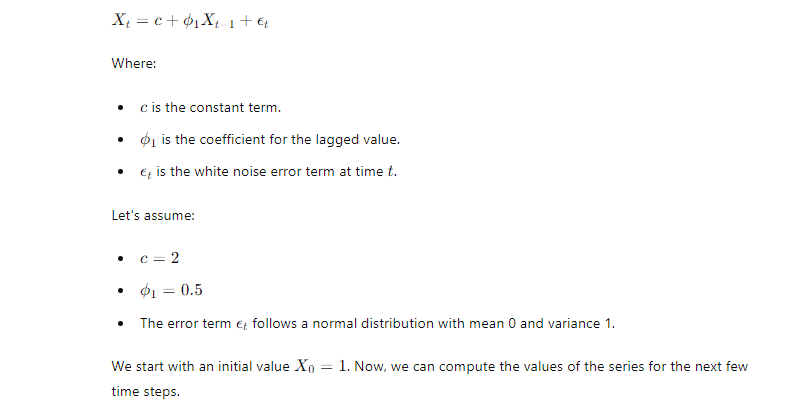

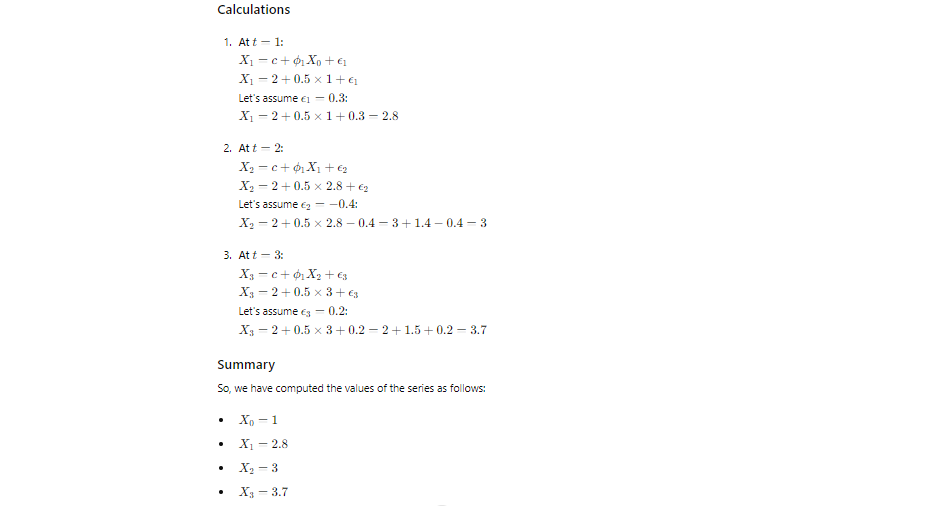

In [1]:
##  example to implement AR(1) using Numpy
import numpy as np

def generate_ar1(c, phi1, initial_value, num_steps):
    # Initialize array to store generated values
    series = np.zeros(num_steps)
    series[0] = initial_value
    
    # Generate values for the time series
    for t in range(1, num_steps):
        # Generate random noise from a normal distribution
        epsilon = np.random.normal(0, 1)
        # Calculate value for current time step using AR(1) equation
        series[t] = c + phi1 * series[t-1]+epsilon
    
    return series

In [2]:
# Parameters
c = 2
phi1 = 0.5
initial_value = 1
num_steps = 10

# Generate AR(1) series
ar1_series = generate_ar1(c, phi1, initial_value, num_steps)

# Print generated series
print("Generated AR(1) series:")
for t, value in enumerate(ar1_series):
    print(f"X_{t}: {value}")


Generated AR(1) series:
X_0: 1.0
X_1: 2.391655620577476
X_2: 3.665632543714078
X_3: 3.6576517715229664
X_4: 3.075639955190336
X_5: 1.0785826083246501
X_6: 1.795957695656159
X_7: 2.9820946470466745
X_8: 4.355421082329145
X_9: 4.6218179194324485


## statsmodels library in Python to create an AR(1) model and generate sample data. 

In [3]:
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
c = 3
phi1 = 0.45
num_steps = 120

In [9]:
# Generate AR(1) series
epsilon = np.random.normal(0, 1, num_steps)
X = np.zeros(num_steps)
X[0] = c / (1 - phi1)  # Set initial value using steady state value
for t in range(1, num_steps):
    X[t] = c + phi1 * X[t-1] + epsilon[t]
    
    #print(X[t])

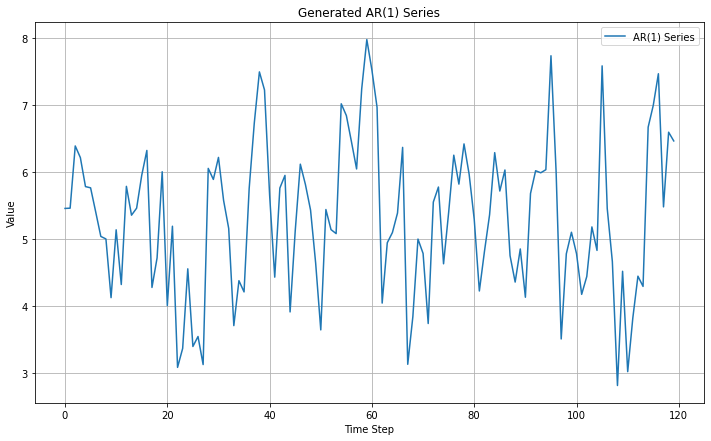

In [10]:
# Plot the generated series
plt.figure(figsize=(12, 7))
plt.plot(X, label='AR(1) Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Generated AR(1) Series')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Fit AR(1) model using statsmodels AutoReg
ar_model = AutoReg(X, lags=1)  # Fit AR(1) model
ar_results = ar_model.fit()

# Print model summary
print(ar_results.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  120
Model:                     AutoReg(1)   Log Likelihood                -166.914
Method:               Conditional MLE   S.D. of innovations              0.984
Date:                Thu, 05 Sep 2024   AIC                            339.829
Time:                        14:46:01   BIC                            348.166
Sample:                             1   HQIC                           343.215
                                  120                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6817      0.434      6.181      0.000       1.831       3.532
y.L1           0.4956      0.080      6.188      0.000       0.339       0.653
                                    Roots           

- Dep. Variable:
This section specifies the dependent variable used in the model. In this case, it's labeled as "y".
- No. Observations:
Indicates the number of observations in the dataset used to fit the model. Here, it's 100.
- Model:
Specifies the type of model used. In this case, it's an AutoReg(1) model, which means it's an autoregressive model of order 1.
- Log Likelihood:
This is the value of the log-likelihood function at the maximum likelihood estimates of the parameters. It measures the goodness-of-fit of the model. A higher log-likelihood indicates a better fit.
- Method:
Indicates the method used for parameter estimation. In this case, it's "Conditional MLE", which stands for Conditional Maximum - Likelihood Estimation.
- S.D. of innovations:
Represents the standard deviation of the innovations (residuals) of the model. It gives an idea of the spread of the errors around the fitted values.
- AIC (Akaike Information Criterion):
AIC is a measure of the model's goodness-of-fit, penalized for the number of parameters in the model. Lower AIC values indicate a better trade-off between model fit and complexity.
- BIC (Bayesian Information Criterion):
Similar to AIC, BIC is another measure of model goodness-of-fit, but it penalizes more heavily for model complexity. It often results in more parsimonious models compared to AIC.
- Sample:
Specifies the range of observations used in the estimation. In this case, it's from observation 1 to 100.
- Coefficients:
Lists the estimated coefficients of the model.
- const: Represents the intercept term.
- y.L1: Represents the coefficient for the lag 1 term of the autoregressive process.
- Standard Error:
Provides the standard errors associated with the estimated coefficients.
- z-Value and P>|z|:
These values are associated with the significance tests for the coefficients.
The z-value is the ratio of the estimated coefficient to its standard error.
- P>|z| is the p-value associated with the null hypothesis that the coefficient is equal to zero. Lower p-values indicate greater significance.
- Confidence Intervals [0.025 0.975]:
Provides the 95% confidence intervals for the estimated coefficients.
Roots:
- ists the roots of the autoregressive polynomial. In this case, the AR polynomial has one real root at approximately 1.7072.

## Example to predict attrition rate using AR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Step 1: Read the data # Update with your file path
data = pd.read_csv("attrition_data.csv")

# Step 2: Basic Data Description

data.head(2) 

In [ ]:
# Convert the Year column to datetime format for index
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)
data.head(2)

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
# Step 3: Data Visualization
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['Attrition Rate'], label='Attrition Rate')
plt.title('Attrition Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Attrition Rate')
plt.legend()
plt.show()

In [ ]:
# Step 4: Auto Regression Model Fitting (AR(1))
model = AutoReg(data['Attrition Rate'], lags=1)
model_fit = model.fit()

# Print the model summary
print("\nAR Model Summary:")
print(model_fit.summary())



In [ ]:
# Step 5: Make Predictions
predictions = model_fit.predict(start=len(data), end=len(data) + 2, dynamic=False)

# Create a DataFrame for predictions
last_year = data.index[-1].year
prediction_years = pd.date_range(start=f'{last_year + 1}', periods=3, freq='Y')
predictions_df = pd.DataFrame({'Year': prediction_years, 'PredictedAttritionRate': predictions})
predictions_df.set_index('Year', inplace=True)

# Step 6: Visualization of Observed and Predicted Values
plt.figure(figsize=(16, 6))
plt.plot(data.index, data['Attrition Rate'], label='Observed Attrition Rate')
plt.plot(predictions_df.index, predictions_df['PredictedAttritionRate'], label='Predicted Attrition Rate', color='darkgreen')
plt.title('Observed and Predicted Attrition Rate')
plt.xlabel('Year')
plt.ylabel('Attrition Rate')
plt.legend()
plt.show()

In [ ]:
## Working on same for Lag 2
# Step 4: Auto Regression Model Fitting (AR(2))
model = AutoReg(data['Attrition Rate'], lags=2)
model_fit = model.fit()

# Print the model summary
print("\nAR Model Summary:")
print(model_fit.summary())

In [ ]:


# Step 5: Make Predictions
predictions = model_fit.predict(start=len(data), end=len(data) + 2, dynamic=False)

# Create a DataFrame for predictions
last_year = data.index[-1].year
prediction_years = pd.date_range(start=f'{last_year + 1}', periods=3, freq='Y')
predictions_df = pd.DataFrame({'Year': prediction_years, 'PredictedAttritionRate': predictions})
predictions_df.set_index('Year', inplace=True)

# Step 6: Visualization of Observed and Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Attrition Rate'], label='Observed Attrition Rate')
plt.plot(predictions_df.index, predictions_df['PredictedAttritionRate'], label='Predicted Attrition Rate', color='red')
plt.title('Observed and Predicted Attrition Rate')
plt.xlabel('Year')
plt.ylabel('Attrition Rate')
plt.legend()
plt.show()

## Determining the Best Lag using AIC and BIC

| Aspect               | Autocorrelation                           | Partial Autocorrelation                     |
|----------------------|-------------------------------------------|---------------------------------------------|
| Definition           | Correlation with lagged versions of itself | Correlation with lagged versions, controlling for other lags |
| Influence            | Direct influence of all previous observations | Removes indirect effects through intermediate observations |
| Calculation Method   | Autocorrelation Function (ACF)            | Partial Autocorrelation Function (PACF)    |
| Interpretation       | Identifies serial correlation in a time series | Determines order of autoregressive models  |
| Role in Time Series  | Detects patterns like trends or seasonality | Identifies significant lags in AR models   |
| Mathematical Formula | Autocorrelation at lag k: ρ_k             | Partial autocorrelation at lag k: ϕ_{k,k} |


Sales    Day 

1000     23
2000     24
3000     25
4000     26 

Sales for 27th: AR(1) = 26th -25th, 25th-24th, 24-23, 23
                AR(2) = 26th,25t and 24th 

In [ ]:
# Step 4: Determining the Best Lag using AIC and BIC
aic_values = []
bic_values = []
lag_range = range(1, 5)  # You can extend this range as needed

for lag in lag_range:
    model = AutoReg(data['Attrition Rate'], lags=lag)
    model_fit = model.fit()
    aic_values.append(model_fit.aic)
    bic_values.append(model_fit.bic)

best_aic_lag = lag_range[np.argmin(aic_values)]
best_bic_lag = lag_range[np.argmin(bic_values)]

print(f"Best lag according to AIC: {best_aic_lag}")
print(f"Best lag according to BIC: {best_bic_lag}")

In [ ]:

# Fit the AR model with the best lag according to AIC
model = AutoReg(data['Attrition Rate'], lags=best_aic_lag)
model_fit = model.fit()

# Print the model summary
print("\nAR Model Summary:")
print(model_fit.summary())

# Step 5: Make Predictions
predictions = model_fit.predict(start=len(data), end=len(data) + 11, dynamic=False)

# Create a DataFrame for predictions
last_year = data.index[-1].year
prediction_years = pd.date_range(start=f'{last_year + 1}', periods=12, freq='Y')
predictions_df = pd.DataFrame({'Year': prediction_years, 'PredictedAttritionRate': predictions})
predictions_df.set_index('Year', inplace=True)

# Step 6: Visualization of Observed and Predicted Values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Attrition Rate'], label='Observed Attrition Rate')
plt.plot(predictions_df.index, predictions_df['PredictedAttritionRate'], label='Predicted Attrition Rate', color='red')
plt.title('Observed and Predicted Attrition Rate')
plt.xlabel('Year')
plt.ylabel('Attrition Rate')
plt.legend()
plt.show()